7524
Model: Random Forest Regressor
Features: ['VOC_ONBOARD_last', 'DBC_ONBOARD_last', 'CO2_SS_1_last', 'MOVEMENT_ONBOARD_last', 'VOC_range', 'CO2_range', 'DBC_range']
Mean Squared Error (MSE): 0.13356093023255816
R-squared (R2): 0.8100514832014345
Mean Absolute Error (MAE): 0.14764119601328904
Feature: MOVEMENT_ONBOARD_last, Importance: 0.7155849881784639
Feature: CO2_SS_1_last, Importance: 0.12825427081824028
Feature: DBC_ONBOARD_last, Importance: 0.040742646781185325
Feature: CO2_range, Importance: 0.03300859001466681
Feature: VOC_ONBOARD_last, Importance: 0.0327424760896043
Feature: DBC_range, Importance: 0.03162005406893596
Feature: VOC_range, Importance: 0.01804697404890332


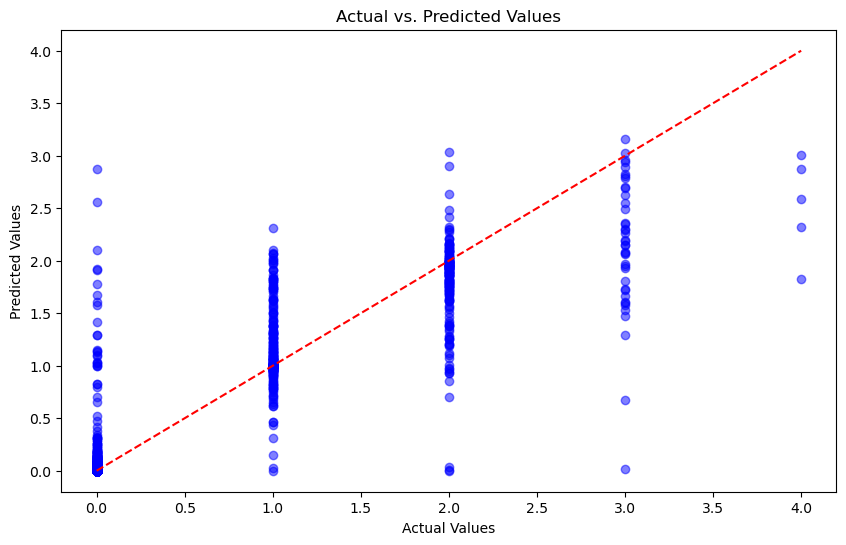

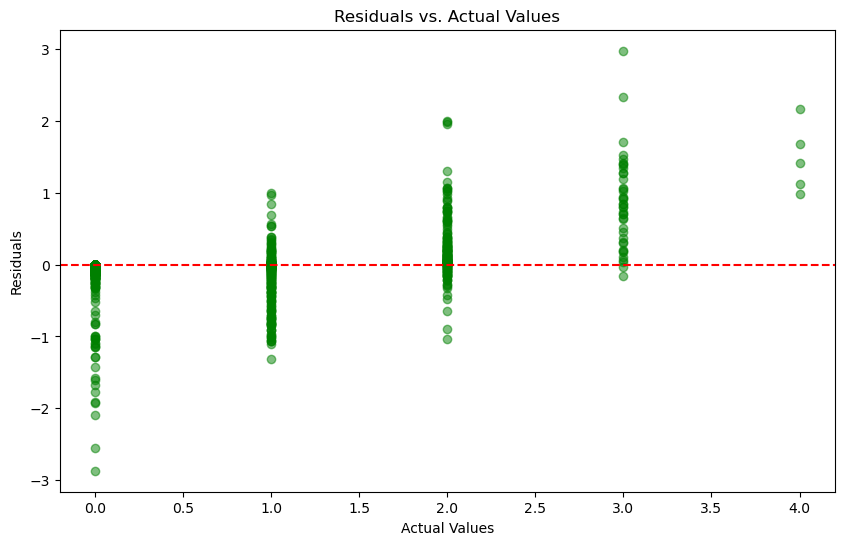

In [2]:
#Random Forest Regressor, Dartford

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Load your data from 'data.csv'
df = pd.read_csv('Dartford/final_combined_560B_7885_data_Dart_21st_Nov.csv', delimiter=",")

# Drop useless columns
drop_columns = ['MOVEMENT_ONBOARD_min', 'MOVEMENT_ONBOARD_max', 'MOVEMENT_ONBOARD_avg']
df = df.drop(columns=drop_columns)
print(len(df))
# Convert 'Datetime' column to datetime format with dayfirst=True
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

# Calculate the rate of change for the specified columns
rate_interest = ['VOC_ONBOARD_last', 'VOC_ONBOARD_min', 'VOC_ONBOARD_max', 'VOC_ONBOARD_avg',
                'CO2_SS_1_avg', 'CO2_SS_1_min', 'CO2_SS_1_max', 'CO2_SS_1_last',  'DBC_ONBOARD_max', 'DBC_ONBOARD_min', 'DBC_ONBOARD_avg', 'DBC_ONBOARD_last']
df[rate_interest] = df[rate_interest].replace(',', '.', regex=True).astype(float)

#Convert string columns to numeric
df['VOC_ONBOARD_max'] = pd.to_numeric(df['VOC_ONBOARD_max'], errors='coerce')
df['VOC_ONBOARD_min'] = pd.to_numeric(df['VOC_ONBOARD_min'], errors='coerce')
df['VOC_ONBOARD_last'] = pd.to_numeric(df['VOC_ONBOARD_last'], errors='coerce')

df['CO2_SS_1_max'] = pd.to_numeric(df['CO2_SS_1_max'], errors='coerce')
df['CO2_SS_1_min'] = pd.to_numeric(df['CO2_SS_1_min'], errors='coerce')
df['CO2_SS_1_last'] = pd.to_numeric(df['CO2_SS_1_last'], errors='coerce')
df['CO2_range'] = df['CO2_SS_1_max'] - df['CO2_SS_1_min']
df['VOC_range'] = df['VOC_ONBOARD_max'] - df['VOC_ONBOARD_min']

#Convert string columns to numeric
df['DBC_ONBOARD_max'] = pd.to_numeric(df['DBC_ONBOARD_max'], errors='coerce')
df['DBC_ONBOARD_min'] = pd.to_numeric(df['DBC_ONBOARD_min'], errors='coerce')
df['DBC_ONBOARD_last'] = pd.to_numeric(df['DBC_ONBOARD_last'], errors='coerce')
df['DBC_range'] = df['DBC_ONBOARD_max'] - df['DBC_ONBOARD_min']

# Define the feature sets, each with a different set of columns
feature_sets = [

    #[ 'CO2_SS_1_last','CO2_range','MOVEMENT_ONBOARD_last']
     ['VOC_ONBOARD_last', 'DBC_ONBOARD_last','CO2_SS_1_last', 'MOVEMENT_ONBOARD_last', 'VOC_range','CO2_range', 'DBC_range']
]

for feature_columns in feature_sets:
    # Replace commas (,) with periods (.) in feature columns and convert to float
    df[feature_columns] = df[feature_columns].replace(',', '.', regex=True).astype(float)

    # Specify the target column
    target_column = 'VOC_ONBOARD_Inferred Occupancy'

    # Split the data into features (X) and target (y)
    X = df[feature_columns]
    X_scaled = df[feature_columns]
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)
       
    # Create and train the models
    models = [
        ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
        
    ]

    for model_name, model in models:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate Mean Squared Error (MSE) and R-squared
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"Model: {model_name}")
        print(f"Features: {feature_columns}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"R-squared (R2): {r2}")
        print(f"Mean Absolute Error (MAE): {mae}")

        # Get the feature names and their importance values
        feature_importance_pairs = list(zip(feature_columns, model.feature_importances_))
        # Sort the feature importance pairs by importance (in descending order)
        sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
        # Print feature names and their importance values
        for feature_name, importance in sorted_feature_importance_pairs:
            print(f"Feature: {feature_name}, Importance: {importance}")

        # Plot predicted values vs. actual values vs. residuals
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, c='b', alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs. Predicted Values")
         # Annotate each point with the index (data point number)
        plt.savefig('figures/Actual_vs_predict_Rf_regressor_VOC_DBC_CO2_PIR_last_dart_with_range.png')
        plt.show()

        residuals = y_test - y_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, residuals, c='green', alpha=0.5)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel("Actual Values")
        plt.ylabel("Residuals")
        plt.title("Residuals vs. Actual Values")
        plt.savefig('figures/residual_Rf_regressor_VOC_DBC_CO2_PIR_last_dart_with_range.png')
        plt.show()
        
        from joblib import dump
        #Saving the model
        dump(model, 'Model/RF_regressor_VOC_DBC_CO2_PIR_last_dart_with_range.joblib')
        print("\n")
